In [4]:
# must include in the folder with this .py/.ipynb file data file .csv 'mlbootcamp5_train.csv', which could be found on github page of mlcourse.ai
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
sns.set()

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker

In [6]:
%matplotlib inline

In [8]:
sns.set_context("notebook",
                font_scale = 1.5,
                rc = {
                    "figure.figsize": (11, 8),
                    "axes.titlesize": 18
                }
)

from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8

In [10]:
df = pd.read_csv('mlbootcamp5_train.csv', sep=';')
print('Dataset size: ', df.shape)
df.head()

Dataset size:  (70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


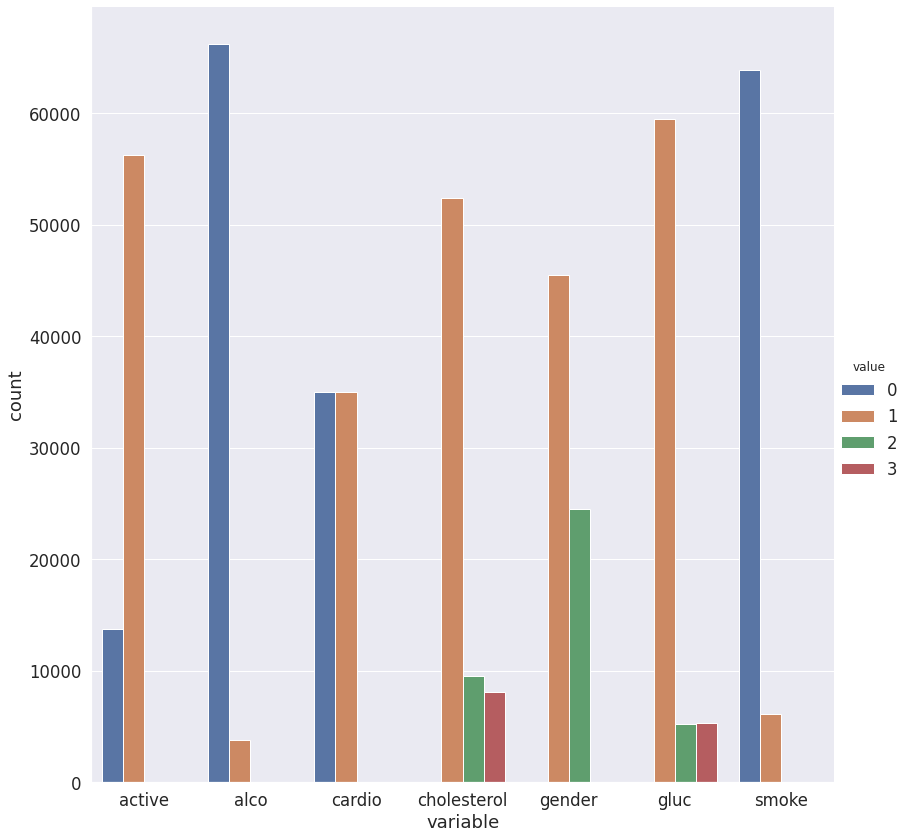

In [11]:
df_uniques = pd.melt(frame = df, value_vars = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 'value'])['value'].count()) \
    .sort_index(level = [0, 1]) \
    .rename(columns = {'value' : 'count'}) \
    .reset_index()

sns.factorplot(x = 'variable', y = 'count', hue = 'value', data = df_uniques, kind = 'bar', size = 12);

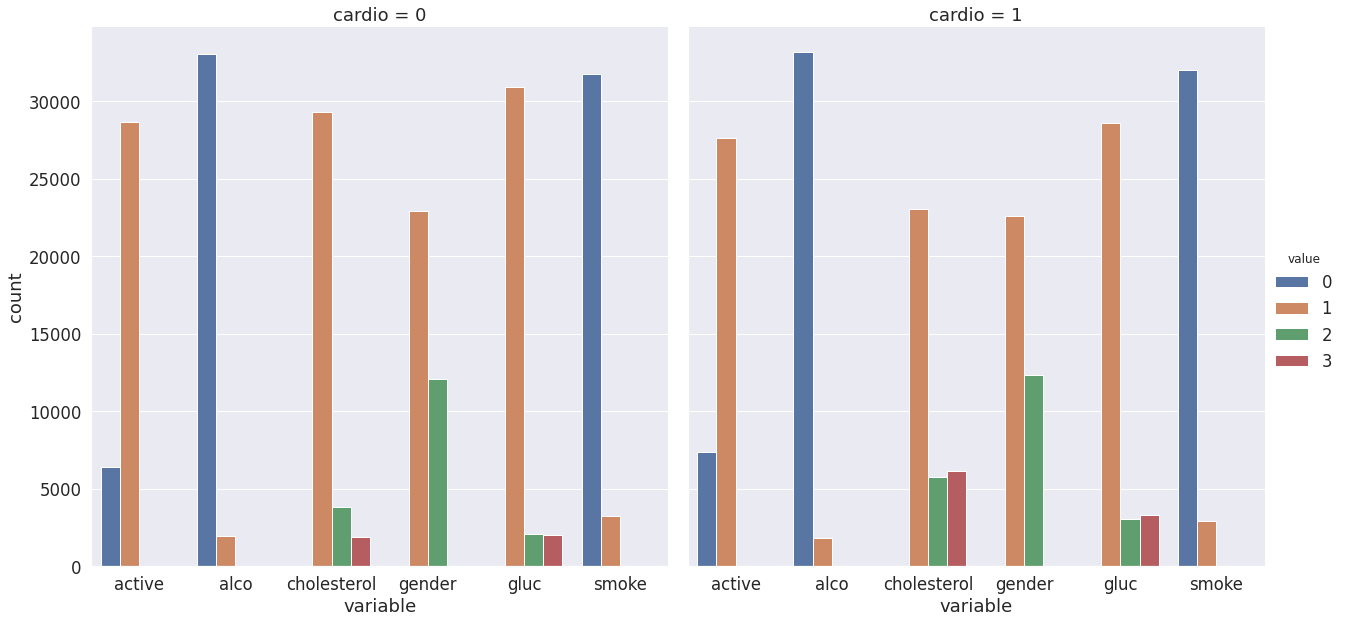

In [12]:
df_uniques = pd.melt(frame = df, value_vars = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active'], id_vars = ['cardio'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 'value', 'cardio'])['value'].count()) \
    .sort_index(level = [0, 1]) \
    .rename(columns = {'value' : 'count'}) \
    .reset_index()

sns.factorplot(x = 'variable', y = 'count', hue = 'value', col = 'cardio', data = df_uniques, kind = 'bar', size = 9);

In [13]:
for c in df.columns:
  n = df[c].nunique()
  print(c)
  if n <= 3:
    print(n, sorted(df[c].value_counts().to_dict().items()))
  else:
    print(n)
  print(10 * '-')

id
70000
----------
age
8076
----------
gender
2 [(1, 45530), (2, 24470)]
----------
height
109
----------
weight
287
----------
ap_hi
153
----------
ap_lo
157
----------
cholesterol
3 [(1, 52385), (2, 9549), (3, 8066)]
----------
gluc
3 [(1, 59479), (2, 5190), (3, 5331)]
----------
smoke
2 [(0, 63831), (1, 6169)]
----------
alco
2 [(0, 66236), (1, 3764)]
----------
active
2 [(0, 13739), (1, 56261)]
----------
cardio
2 [(0, 35021), (1, 34979)]
----------


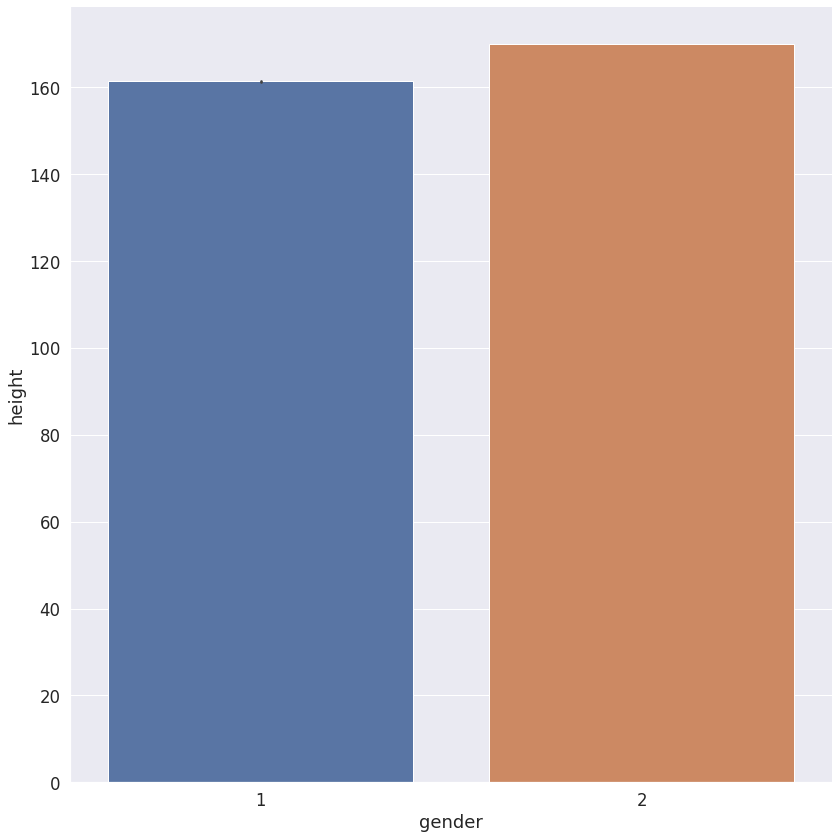

In [25]:
sns.factorplot(x='gender', y='height', 
               data=df, kind='bar', size=12);

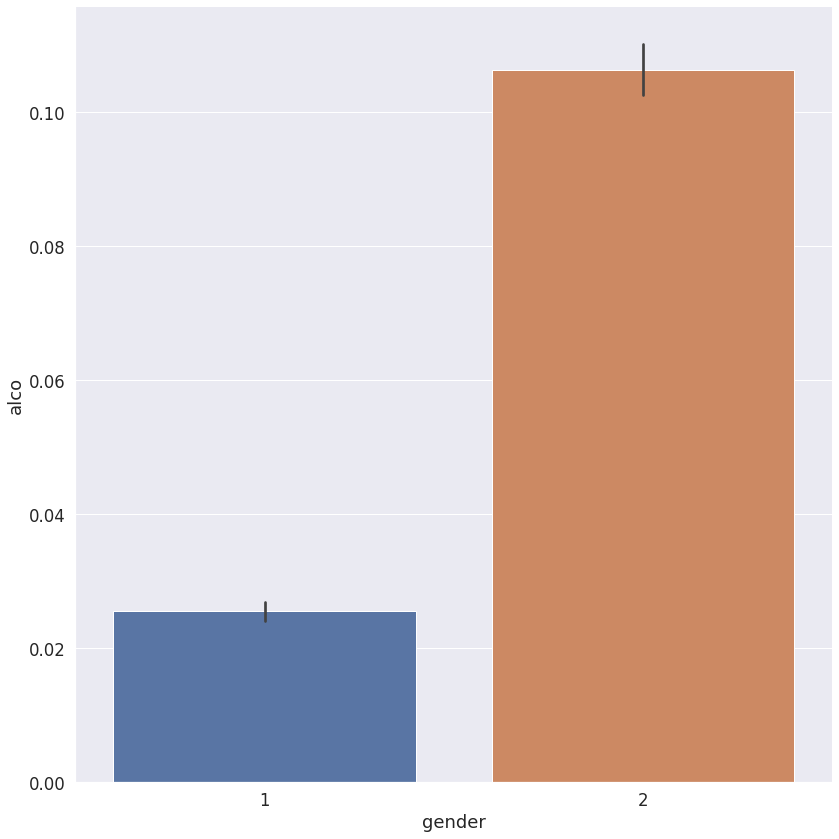

In [26]:
sns.factorplot(x='gender', y='alco', 
               data=df, kind='bar', size=12);

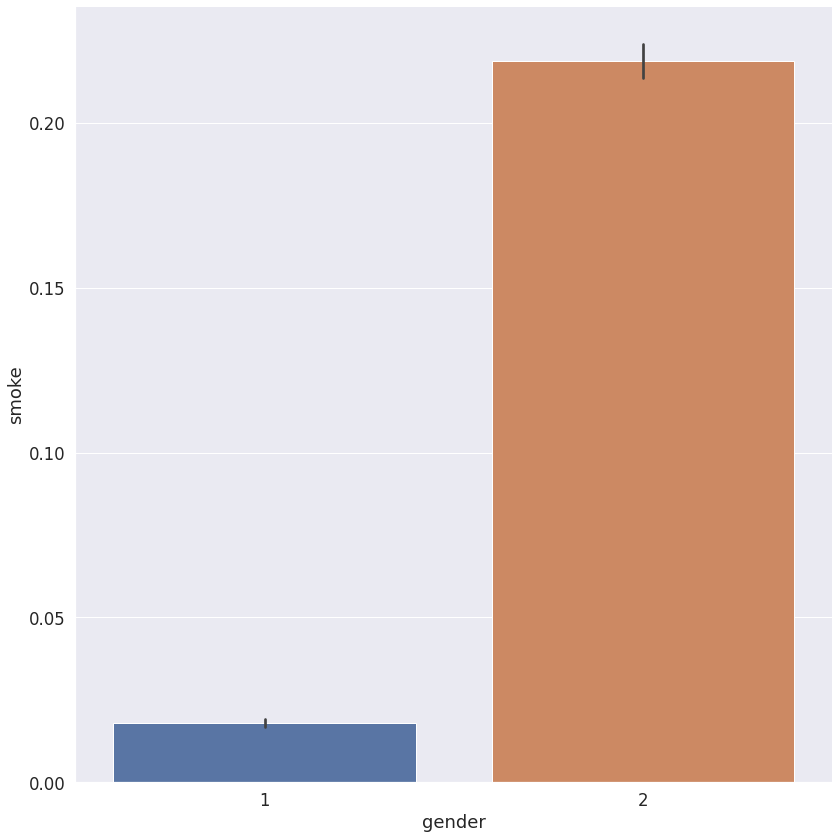

In [46]:
sns.factorplot(x='gender', y='smoke', 
               data=df, size = 12, kind='bar');

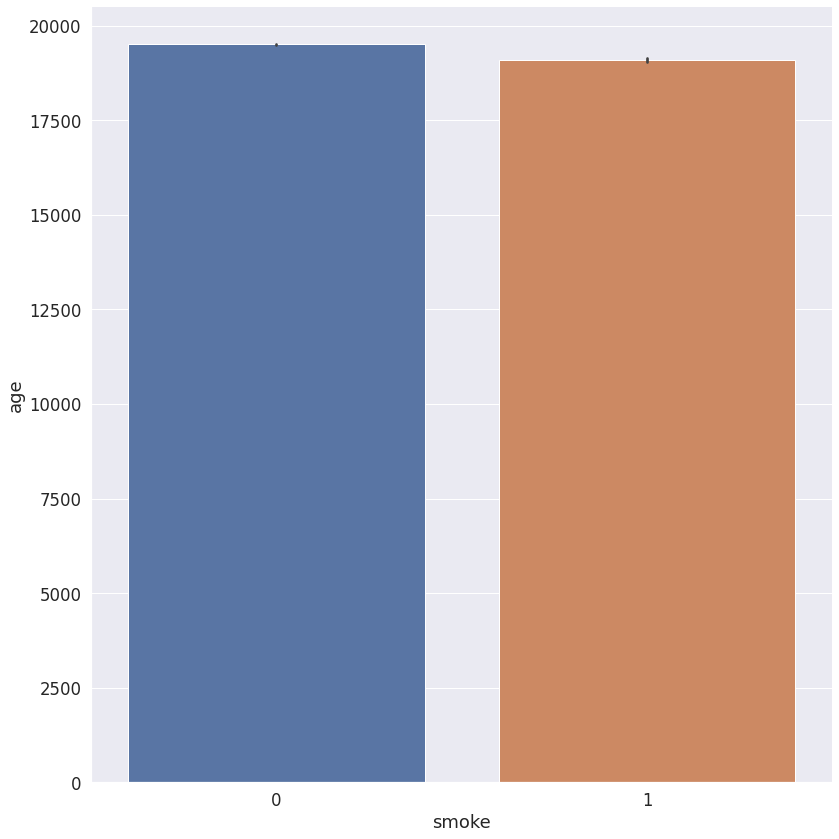

In [48]:
sns.factorplot(x='smoke', y='age', 
               data=df, size = 12, kind='bar');

In [53]:
df[df['smoke'] == 1]['age'].median

<bound method Series.median of 14       14532
19       21755
38       23388
58       15901
59       20431
         ...  
69950    19137
69953    17373
69957    15536
69970    22572
69995    19240
Name: age, Length: 6169, dtype: int64>

In [55]:
df.groupby('gender')['smoke'].mean()
round(100 * (df.loc[df['gender'] == 2, 'smoke'].mean() - df.loc[df['gender'] == 1, 'smoke'].mean()))

20

In [56]:
df['age_years'] = (df['age'] / 365.25).round().astype('int')

In [57]:
df['age_years'].max()

65

In [59]:
smoking_old_men = df[(df['gender'] == 2) & (df['age_years'] >= 60)
                    & (df['age_years'] < 65) & (df['smoke'] == 1)]

In [60]:
smoking_old_men[(smoking_old_men['cholesterol'] == 3) &
               (smoking_old_men['ap_hi'] >= 160) &
               (smoking_old_men['ap_hi'] < 180)]['cardio'].mean()

0.8636363636363636

In [61]:
df['BMI'] = df['weight'] / (df['height'] / 100) ** 2
df['BMI'].median()

26.374068120774975

In [62]:
df.groupby('gender')['BMI'].median()

gender
1    26.709402
2    25.910684
Name: BMI, dtype: float64

In [63]:
df.groupby(['gender', 'alco', 'cardio'])['BMI'].median().to_frame()

BMI
gender alco cardio           
1      0    0       25.654372
            1       27.885187
       1    0       27.885187
            1       30.110991
2      0    0       25.102391
            1       26.674874
       1    0       25.351541
            1       27.530797

In [64]:
filtered_df = df[(df['ap_lo'] <= df['ap_hi']) & 
                 (df['height'] >= df['height'].quantile(0.025)) &
                 (df['height'] <= df['height'].quantile(0.975)) &
                 (df['weight'] >= df['weight'].quantile(0.025)) & 
                 (df['weight'] <= df['weight'].quantile(0.975))]
print(filtered_df.shape[0] / df.shape[0])

0.9037


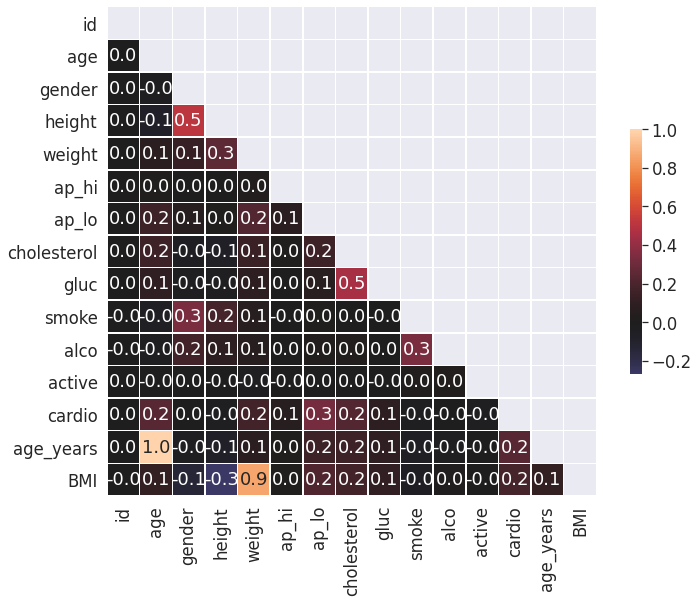

In [65]:
df = filtered_df.copy()
corr = df.corr(method='pearson')

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corr, mask=mask, vmax=1, center=0, annot=True, fmt='.1f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

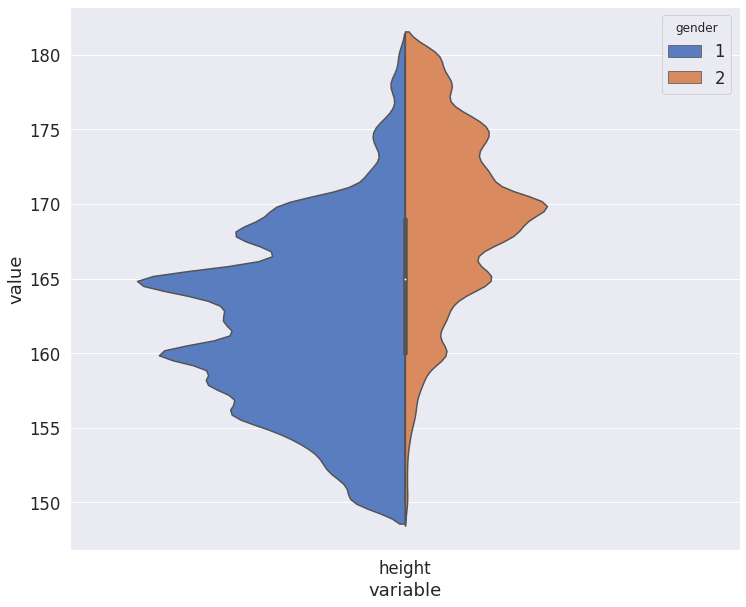

In [66]:
df_melt = pd.melt(frame=df, value_vars=['height'], id_vars=['gender'])

plt.figure(figsize=(12, 10))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='gender', 
    palette="muted", 
    split=True, 
    data=df_melt, 
    scale='count',
    scale_hue=False
)

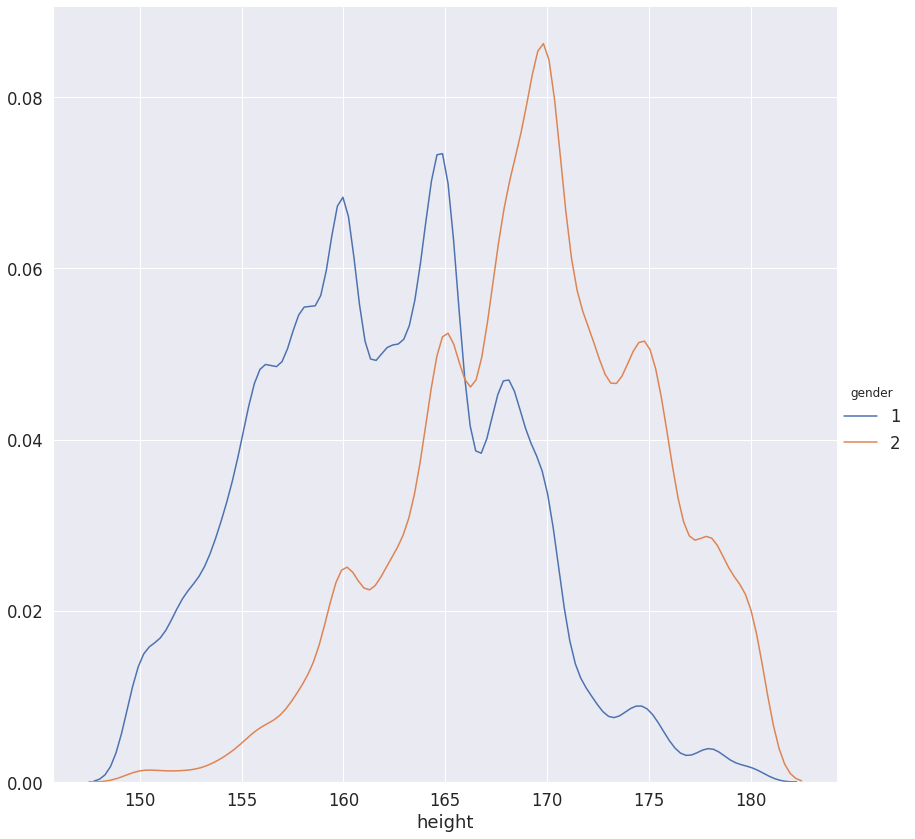

In [67]:


sns.FacetGrid(df, hue="gender", size=12) \
   .map(sns.kdeplot, "height").add_legend();



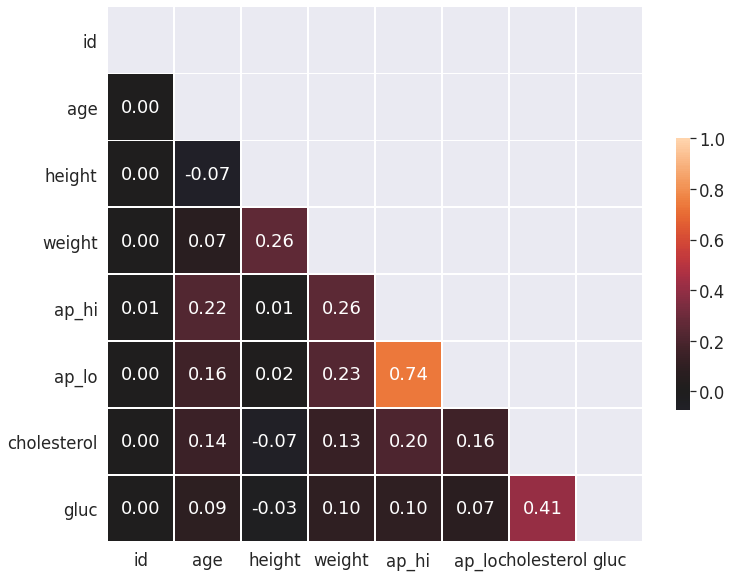

In [68]:
corr = df[['id', 'age', 'height', 'weight', 
           'ap_hi', 'ap_lo', 'cholesterol', 
           'gluc']].corr(method='spearman')

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(corr, mask=mask, vmax=1, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

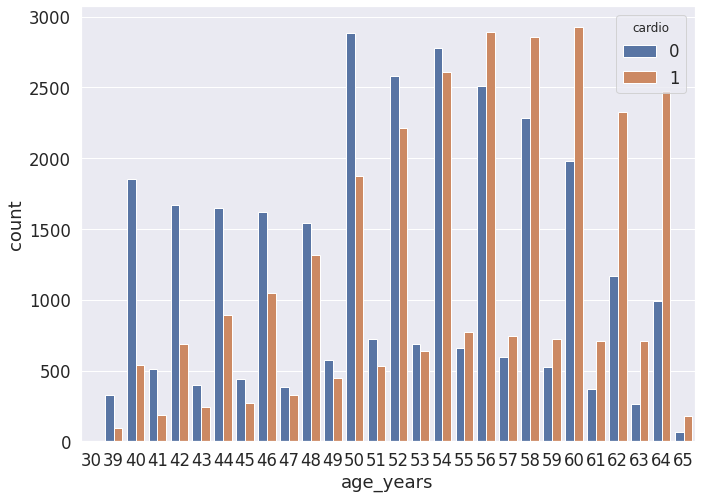

In [69]:
sns.countplot(x="age_years", hue='cardio', data=df);